<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/COVID_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from fbprophet import Prophet
import matplotlib as mpl
import numpy as np
import pandas as pd
from datetime import datetime

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
result = pd.read_excel('Covid-INDIA.xlsx', parse_dates=['date'])
result['date'] = pd.to_datetime(result['date'], errors='coerce')
result.dropna(inplace=True)
result

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths
6,2020-01-06,0,0,0.000,0,0
7,2020-01-07,0,0,0.000,0,0
8,2020-01-08,0,0,0.000,0,0
9,2020-01-09,0,0,0.000,0,0
10,2020-01-10,0,0,0.000,0,0
...,...,...,...,...,...,...
232,2020-08-19,2767273,64531,62519.286,52889,1092
233,2020-08-20,2836925,69652,62898.286,53866,977
234,2020-08-21,2905823,68898,63519.000,54849,983
235,2020-08-22,2975701,69878,64215.571,55794,945


# New Cases per Day

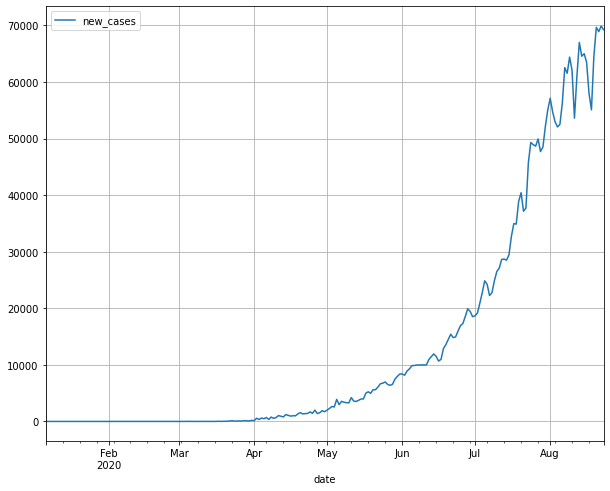

In [7]:
df= result.iloc[:,[0,2]]
df= df.set_index(['date'])
df.plot(grid=True)

In [8]:
df= result.loc[:,['date','new_cases']]
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.tail()

,ds,y
232,2020-08-19,64531
233,2020-08-20,69652
234,2020-08-21,68898
235,2020-08-22,69878
236,2020-08-23,69239


In [10]:
case_model = Prophet(interval_width=0.95)
case_model.fit(df)
future = case_model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
233,2020-08-26
234,2020-08-27
235,2020-08-28
236,2020-08-29
237,2020-08-30


In [11]:
forecast = case_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
233,2020-08-26,74329.294941,70944.354261,77970.086946
234,2020-08-27,76109.936598,72615.538018,79527.497471
235,2020-08-28,77379.331516,73661.253251,80819.927044
236,2020-08-29,78320.002265,74905.991015,81713.316070
237,2020-08-30,79319.916106,75766.752190,82841.161333


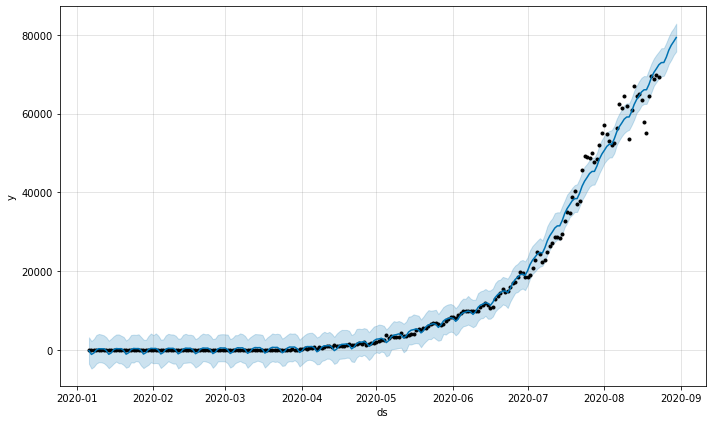

In [12]:
confirmed_forecast_plot = case_model.plot(forecast)

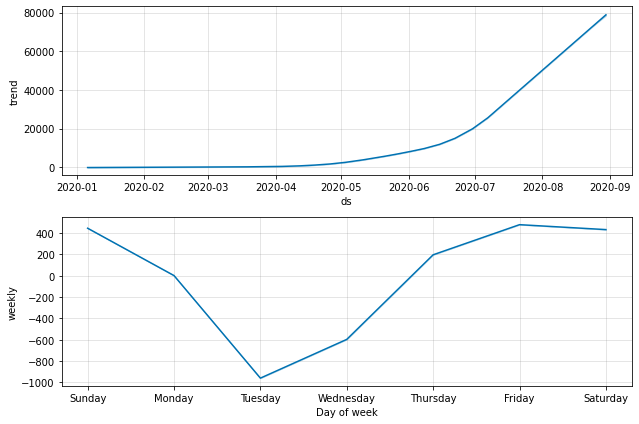

In [13]:
confirmed_forecast_plot = case_model.plot_components(forecast)

# New Deaths per Day

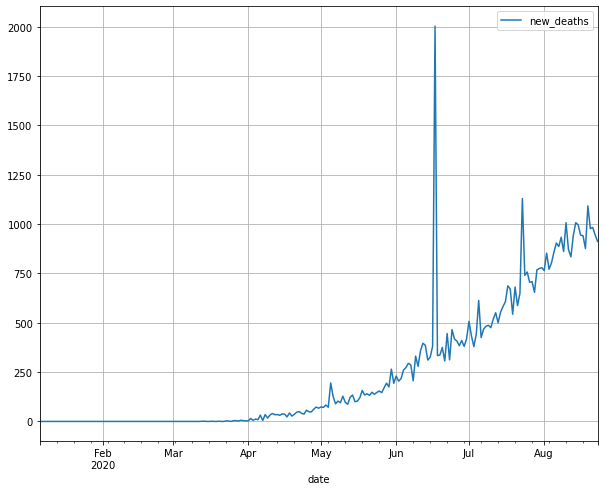

In [14]:
df1= result.iloc[:,[0,5]]
df1= df1.set_index(['date'])
df1.plot(grid=True)

In [15]:
df= result.loc[:,['date','new_deaths']]
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [16]:
df.tail()

,ds,y
232,2020-08-19,1092
233,2020-08-20,977
234,2020-08-21,983
235,2020-08-22,945
236,2020-08-23,912


In [17]:
death_model = Prophet(interval_width=0.95)
death_model.fit(df)
future = death_model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
233,2020-08-26
234,2020-08-27
235,2020-08-28
236,2020-08-29
237,2020-08-30


In [18]:
forecast = death_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
233,2020-08-26,1045.433910,811.168440,1279.404348
234,2020-08-27,1015.411333,787.689980,1245.410136
235,2020-08-28,1010.759682,788.212072,1231.726279
236,2020-08-29,1022.471333,804.497337,1251.684278
237,2020-08-30,1020.745576,785.345509,1253.464303


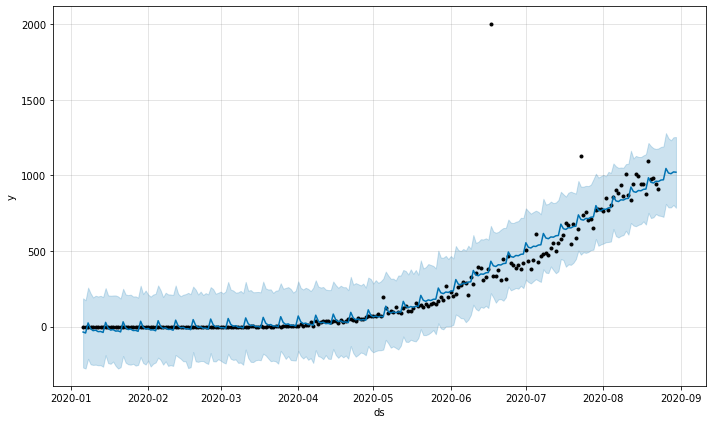

In [19]:
confirmed_forecast_plot = death_model.plot(forecast)

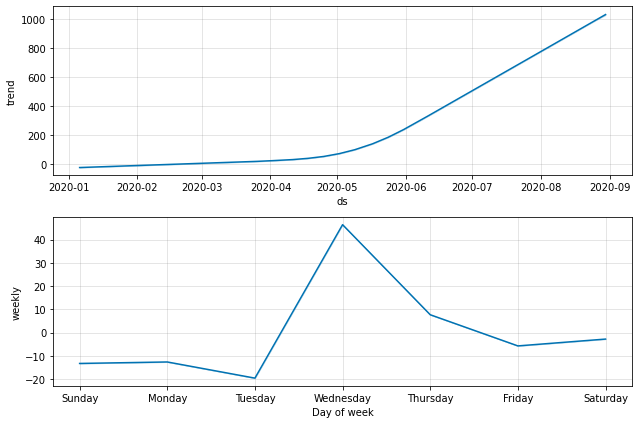

In [20]:
confirmed_forecast_plot = death_model.plot_components(forecast)